In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
imdb_raw = pd.read_csv('imdb_labelled.txt', delimiter = '\t', header = None) 
imdb_raw.columns = ('text', 'sentiment')

In [3]:
imdb_raw.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
# Kewword for reviews
keywords = ['bad', 'waste', 'useless', 'poor', 'not good', 'good', 'excellent', 'great', 
            'impressed', 'quality', 'hate','problems', 'dissapointed', 'unhappy', 'negative', 'awful', 'lacked','unhappy',
            'avoid', 'terrible']
for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
    str(key),
    case = False)

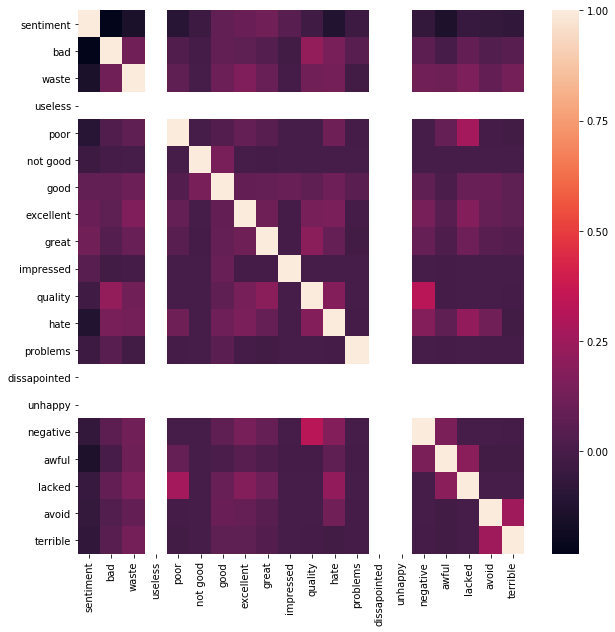

In [5]:
#To show the independence among the selected variables 
plt.figure(figsize=(10, 10))
sns.heatmap(imdb_raw.corr())

In [6]:
#Identifying the total negative and positive sentiments
imdb_count = imdb_raw.sentiment.value_counts()
print('Total\n Percent Positive: {}\t Percent Negative: {}'.format(100 * imdb_count[0]/ (imdb_raw.shape[0]), 
                                                                   100 * imdb_count[1]/ (imdb_raw.shape[0])))


Total
 Percent Positive: 48.39572192513369	 Percent Negative: 51.60427807486631


In [7]:
# splitting the  data into train and test groups
np.random.seed(222)
imdb_train = imdb_raw.sample(frac= 0.75, replace=False)
imdb_test = imdb_raw.sample(frac= 0.25, replace = False)

imdb_count_train = imdb_train.sentiment.value_counts()
print('Train\n Percent Positive:{} \t Percent Negative: {}'. format(100* imdb_count_train[0] /(imdb_train.shape[0]), 
                                                                    100* imdb_count_train [1]/ (imdb_train.shape[0])))

imdb_count_test = imdb_test.sentiment.value_counts()
print('Test\n Percent Positive:{} \t Percent Negative:{}'.format(100* imdb_count_test[0]/ (imdb_test.shape[0]),
                                                                100* imdb_count_test[1]/ (imdb_test.shape[0])))

Train
 Percent Positive:47.05882352941177 	 Percent Negative: 52.94117647058823
Test
 Percent Positive:49.73262032085562 	 Percent Negative:50.26737967914438


In [8]:
## Original model for train and test datasest
# x and y values
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

# Our data is boolean and hence we are importing Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

# Importing confusion matrix
from sklearn.metrics import confusion_matrix

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

##For train

# Fit our model to the data
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
y_pred_train = bnb.predict(data_train )

#Display or result
print('Number of mislabeled point out of a total {} points: {}'.format(
data_train.shape[0],
(target_train != y_pred_train).sum()
))

#For test

bnb.fit(data_test, target_test)
y_pred_test = bnb.predict(data_test)
print('Number of mislabeled points out of a total {} points: {}'. format(
     data_test.shape[0],
(target_test != y_pred_test).sum()
))

#percent mislabeled

# Train
print('Accuracy: ', (100* ((target_train == y_pred_train).sum()) /data_train.shape[0]), '%')
conf = confusion_matrix(target_train, y_pred_train)
print(conf)
print('Sensitivity:', 100*conf[1,1]/ (conf[1,1]+ conf[1,0]), '%')
print('Specificity:', 100* conf[0, 0]/ (conf [0,0] + conf[0, 1]),'%')
 

#Test

print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')

Number of mislabeled point out of a total 561 points: 190
Number of mislabeled points out of a total 187 points: 67
Accuracy:  66.13190730837789 %
[[ 81 183]
 [  7 290]]
Sensitivity: 97.64309764309765 %
Specificity: 30.681818181818183 %
Accuracy:  64.1711229946524 %
[[27 66]
 [ 1 93]]
Sensitivity:  98.93617021276596 %
Specificity:  29.032258064516128 %


In [9]:
# Removing some of the features
keywords = ['bad', 'waste', 'useless', 'poor', 'not good','problems', 'dissapointed', 'unhappy', 'negative', 'awful', 'lacked','unhappy',
            'avoid', 'terrible']

for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
    str(key),
    case = False)
    
# Splitting the data into train and test groups
np.random.seed(222)
imdb_train = imdb_raw.sample(frac= 0.75, replace = False)
imdb_test = imdb_raw.sample(frac = 0.25, replace = True)

# Identifying x and y variables for train and test

data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

bnb = BernoulliNB()

#For train
bnb.fit(data_train, target_train)
y_pred_train = bnb.predict(data_train)
print('Number of mislabeled points out of total {} points : {}'. format(
data_train.shape[0],
(target_train != y_pred_train).sum()))

#For test
bnb.fit(data_test, target_test)
y_pred_test = bnb.predict(data_test)
print('Number of mislabeled points out of total {} points: {}'. format(
data_test.shape[0],
(target_test != y_pred_test).sum()))

# percent mislabeled
print('Accuracy: ', (100* ((target_train == y_pred_train). sum())/ data_train.shape[0]), '%')
conf = confusion_matrix(target_train, y_pred_train)
print(conf)
print('Sensitivity:', 100* conf[1,1]/ (conf[1,1]+ conf[1,0]), '%')
print('Specificity:', 100* conf[0,0]/ (conf[0,0]+ conf[0,1]), '%')
    
      
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')

Number of mislabeled points out of total 561 points : 193
Number of mislabeled points out of total 187 points: 70
Accuracy:  65.59714795008912 %
[[ 78 186]
 [  7 290]]
Sensitivity: 97.64309764309765 %
Specificity: 29.545454545454547 %
Accuracy:  62.5668449197861 %
[[22 67]
 [ 3 95]]
Sensitivity:  96.93877551020408 %
Specificity:  24.719101123595507 %


In [ ]:
#Modeling for individual keywords

In [43]:
#For train

i = 0

for i in np.arange(len(keywords)):
    
    data = data_train.iloc[:, i:i+1]
    
    # Initializing NB
    
    bnb = BernoulliNB()
    
    # Training model 
    
    bnb.fit(data, target_train)
    
    # Classifying test data
    
    y_pred_train = bnb.predict(data)

    # Statistics
    print('Feature {}: {}'.format(i, keywords[i]))
    print('Accuracy: ', (100 * ((target_train == y_pred_train).sum()) /data_train.shape[0]), '%')
    conf = confusion_matrix(target_train, y_pred_train)
    print(conf)
    print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
    print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
    print()
    i += 1

Feature 0: bad
Accuracy:  59.001782531194294 %
[[ 39 225]
 [  5 292]]
Sensitivity:  98.31649831649831 %
Specificity:  14.772727272727273 %

Feature 1: waste
Accuracy:  55.080213903743314 %
[[ 13 251]
 [  1 296]]
Sensitivity:  99.66329966329967 %
Specificity:  4.924242424242424 %

Feature 2: useless
Accuracy:  52.94117647058823 %
[[  0 264]
 [  0 297]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 3: poor
Accuracy:  54.01069518716577 %
[[  6 258]
 [  0 297]]
Sensitivity:  100.0 %
Specificity:  2.272727272727273 %

Feature 4: not good
Accuracy:  53.11942959001782 %
[[  1 263]
 [  0 297]]
Sensitivity:  100.0 %
Specificity:  0.3787878787878788 %

Feature 5: problems
Accuracy:  53.297682709447415 %
[[  3 261]
 [  1 296]]
Sensitivity:  99.66329966329967 %
Specificity:  1.1363636363636365 %

Feature 6: dissapointed
Accuracy:  52.94117647058823 %
[[  0 264]
 [  0 297]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 7: unhappy
Accuracy:  52.94117647058823 %
[[  0 264]
 [  0 297]]
Sensi

In [42]:
# For test

i = 0

for i in np.arange(len(keywords)):
    
    data = data_test.iloc[:, i:i+1]
    
    # Initializing NB
    
    bnb = BernoulliNB()
    
    # Training model 
    
    bnb.fit(data, target_test)
    
    # Classifying test data
    
    y_pred_test = bnb.predict(data)

    # Statistics
    print('Feature {}: {}'.format(i, keywords[i]))
    print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
    conf = confusion_matrix(target_test, y_pred_test)
    print(conf)
    print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
    print('Specificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
    print()
    i += 1

Feature 0: bad
Accuracy:  56.68449197860963 %
[[11 78]
 [ 3 95]]
Sensitivity:  96.93877551020408 %
Specificity:  12.359550561797754 %

Feature 1: waste
Accuracy:  54.01069518716577 %
[[ 3 86]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  3.3707865168539324 %

Feature 2: useless
Accuracy:  52.406417112299465 %
[[ 0 89]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 3: poor
Accuracy:  54.01069518716577 %
[[ 3 86]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  3.3707865168539324 %

Feature 4: not good
Accuracy:  52.406417112299465 %
[[ 0 89]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 5: problems
Accuracy:  52.406417112299465 %
[[ 0 89]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 6: dissapointed
Accuracy:  52.406417112299465 %
[[ 0 89]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 7: unhappy
Accuracy:  52.406417112299465 %
[[ 0 89]
 [ 0 98]]
Sensitivity:  100.0 %
Specificity:  0.0 %

Feature 8: negative
Accuracy:  52.4064171122

In [45]:
# Selecting few keywords
new_keywords =keywords[2:5]+ keywords[6:9]

data_train = imdb_train[new_keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[new_keywords]
target_test = imdb_test['sentiment']


bnb = BernoulliNB()
bnb.fit(data_train, target_train)
y_pred_train = bnb.predict(data_train)

print('Features:',new_keywords )
print('Accuracy:', (100* ((target_train == y_pred_train).sum())/ data_train.shape[0]),'%')
conf = confusion_matrix(target_train, y_pred_train)
print(conf)
print('Sensitivity:', 100 * conf[1,1]/ (conf[1,1] + conf[1,0]), '%')
print('Specificity:',100* conf[0,0]/ (conf[0,0]+ conf[0,1]), '%')

Features: ['useless', 'poor', 'not good', 'dissapointed', 'unhappy', 'negative']
Accuracy: 54.72370766488414 %
[[ 10 254]
 [  0 297]]
Sensitivity: 100.0 %
Specificity: 3.787878787878788 %
